# lab03: Linear & Non-Linear Filtering

In [2]:
import cv2
from matplotlib import pyplot as plt

![Source Image](./noisyCameraman.tif)

## 1. Linear Filtering

### Mean Filtering with kernel size 3 5 7 

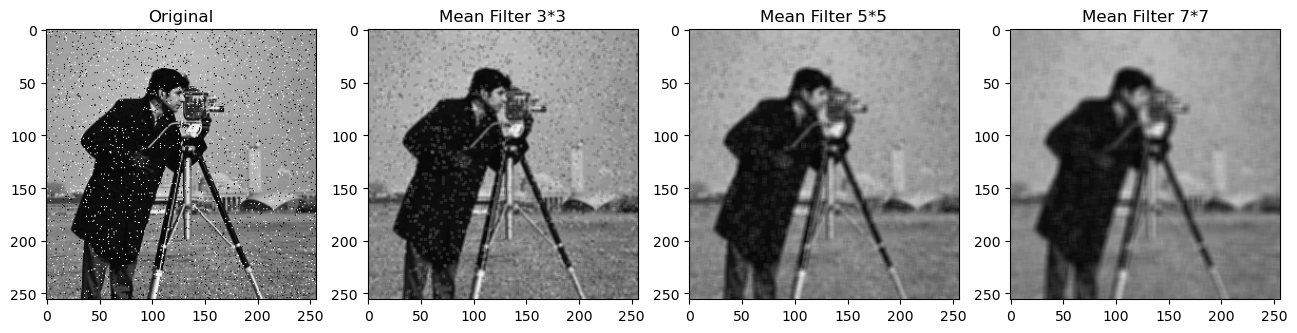

In [3]:
img = cv2.imread('./noisyCameraman.tif')

mean3 = cv2.blur(img, (3,3))
mean5 = cv2.blur(img, (5,5))
mean7 = cv2.blur(img, (7,7))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(13, 6))
ax1.imshow(img, cmap='gray')
ax2.imshow(mean3, cmap="gray")
ax3.imshow(mean5, cmap="gray")
ax4.imshow(mean7, cmap="gray")
ax1.set_title('Original')
ax2.set_title('Mean Filter 3*3')
ax3.set_title('Mean Filter 5*5')
ax4.set_title('Mean Filter 7*7')

plt.tight_layout()
plt.show()

### Gaussian Filtering with $\sigma = 0.5, 1, 1.5$

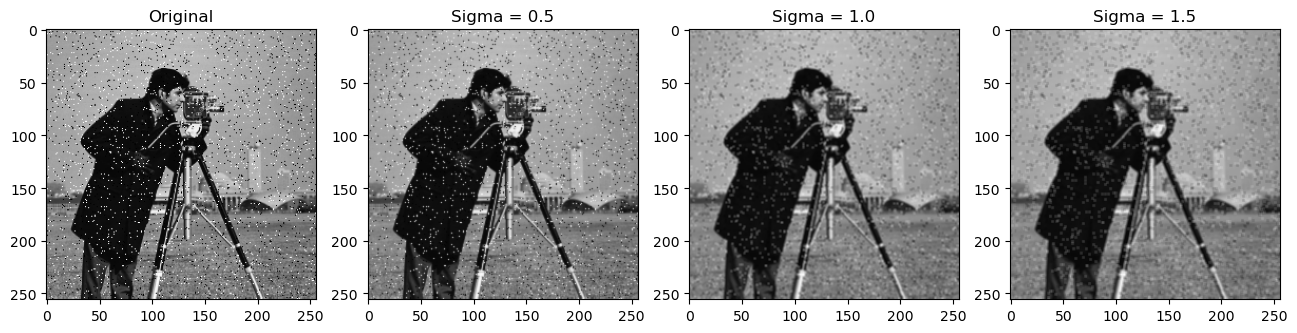

In [4]:
gauss1 = cv2.GaussianBlur(img, (3,3), 0.5)
gauss2 = cv2.GaussianBlur(img, (3,3), 1.0)
gauss3 = cv2.GaussianBlur(img, (3,3), 1.5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(13, 6))

ax1.imshow(img, cmap='gray')
ax2.imshow(gauss1, cmap='gray')
ax3.imshow(gauss2, cmap='gray')
ax4.imshow(gauss3, cmap='gray')
ax1.set_title('Original')
ax2.set_title('Sigma = 0.5')
ax3.set_title('Sigma = 1.0')
ax4.set_title('Sigma = 1.5')

plt.tight_layout()
plt.show()

## 2. Non-Linear Filtering

### Median Filtering with kernel size 3 5 7

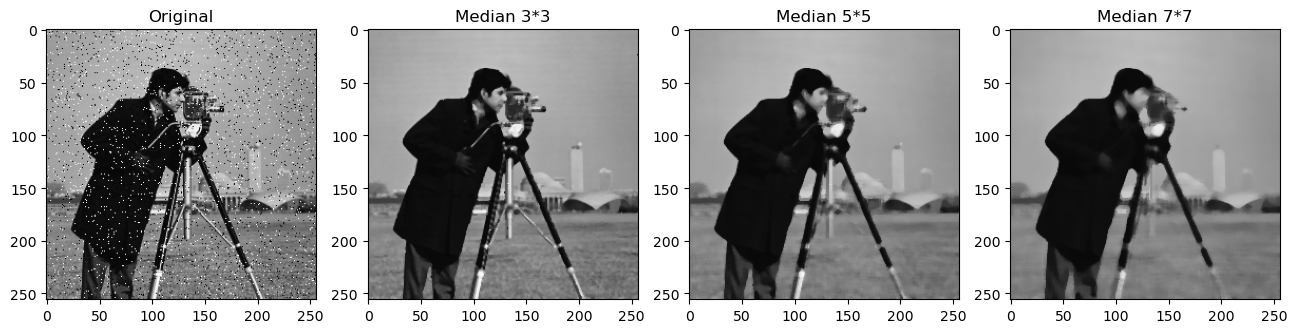

In [5]:
med3 = cv2.medianBlur(img, 3)
med5 = cv2.medianBlur(img, 5)
med7 = cv2.medianBlur(img, 7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(13, 6))
ax1.imshow(img, cmap='gray')
ax2.imshow(med3, cmap='gray')
ax3.imshow(med5, cmap='gray')
ax4.imshow(med7, cmap='gray')
ax1.set_title('Original')
ax2.set_title('Median 3*3')
ax3.set_title('Median 5*5')
ax4.set_title('Median 7*7')

plt.tight_layout()
plt.show()

### Anisotropic Diffusion

`cv2.ximgproc.anisotropicDiffusion(img, alpha, K, niters)`

- `alpha`：扩散系数，控制扩散过程的速度
- `K`：梯度模量阈值，用于控制图像的边缘区域。
- 较小的K值使边缘保持得更好，而较大的K值会导致更强的平滑效果，但可能模糊边缘。
- `niters`: 迭代的次数

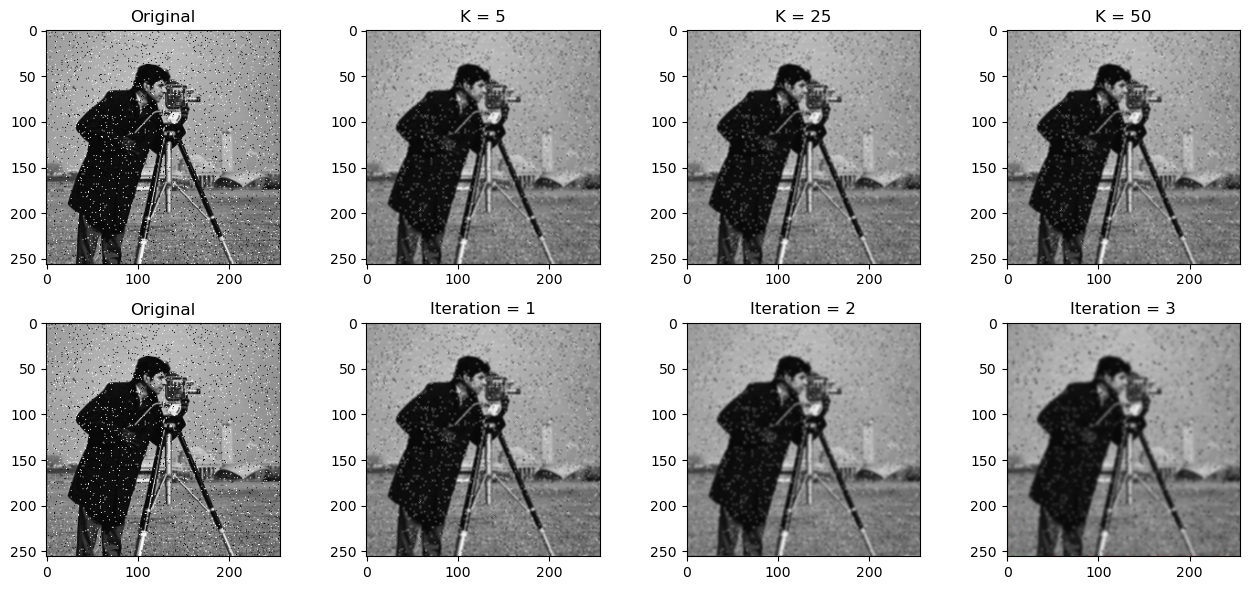

In [6]:
# Change the value of K
aniso5K = cv2.ximgproc.anisotropicDiffusion(img, 0.1, 5, 1)
aniso25K = cv2.ximgproc.anisotropicDiffusion(img, 0.1, 25, 1)
aniso50K = cv2.ximgproc.anisotropicDiffusion(img, 0.1, 50, 1)

# Change the number of iteration
anisoIter1 = cv2.ximgproc.anisotropicDiffusion(img, 0.1, 5, 1)
anisoIter2 = cv2.ximgproc.anisotropicDiffusion(img, 0.1, 5, 2)
anisoIter3 = cv2.ximgproc.anisotropicDiffusion(img, 0.1, 5, 3)

fig, axs = plt.subplots(2, 4, figsize=(13, 6))

axs[0, 0].imshow(img, cmap = 'gray')
axs[0, 1].imshow(aniso5K, cmap = 'gray')
axs[0, 2].imshow(aniso25K, cmap = 'gray')
axs[0, 3].imshow(aniso50K, cmap = 'gray')
axs[0, 0].set_title('Original')
axs[0, 1].set_title('K = 5')
axs[0, 2].set_title('K = 25')
axs[0, 3].set_title('K = 50')

axs[1, 0].imshow(img, cmap = 'gray')
axs[1, 1].imshow(anisoIter1, cmap = 'gray')
axs[1, 2].imshow(anisoIter2, cmap = 'gray')
axs[1, 3].imshow(anisoIter3, cmap = 'gray')
axs[1, 0].set_title('Original')
axs[1, 1].set_title('Iteration = 1')
axs[1, 2].set_title('Iteration = 2')
axs[1, 3].set_title('Iteration = 3')

plt.tight_layout()
plt.show()

### Bilateral Filtering

`cv2.bilateralFilter`函数的参数如下：

- `img`：输入图像。
- `d`：滤波时考虑周围每个像素的直径。如果这个值是非正数，则从sigmaSpace参数计算得到。
- `sigmaColor`：颜色空间的标准差。该参数的值越大，表明该像素邻域内有更多的颜色在滤波时会被混合，导致较大区域的颜色变得更加均匀。
- `sigmaSpace`：坐标空间中的标准差，用于控制像素的邻域大小。sigmaSpace的值越大，意味着越远的像素会相互影响，从而使更大的区域内的像素值相互混合，实现更强的平滑效果。

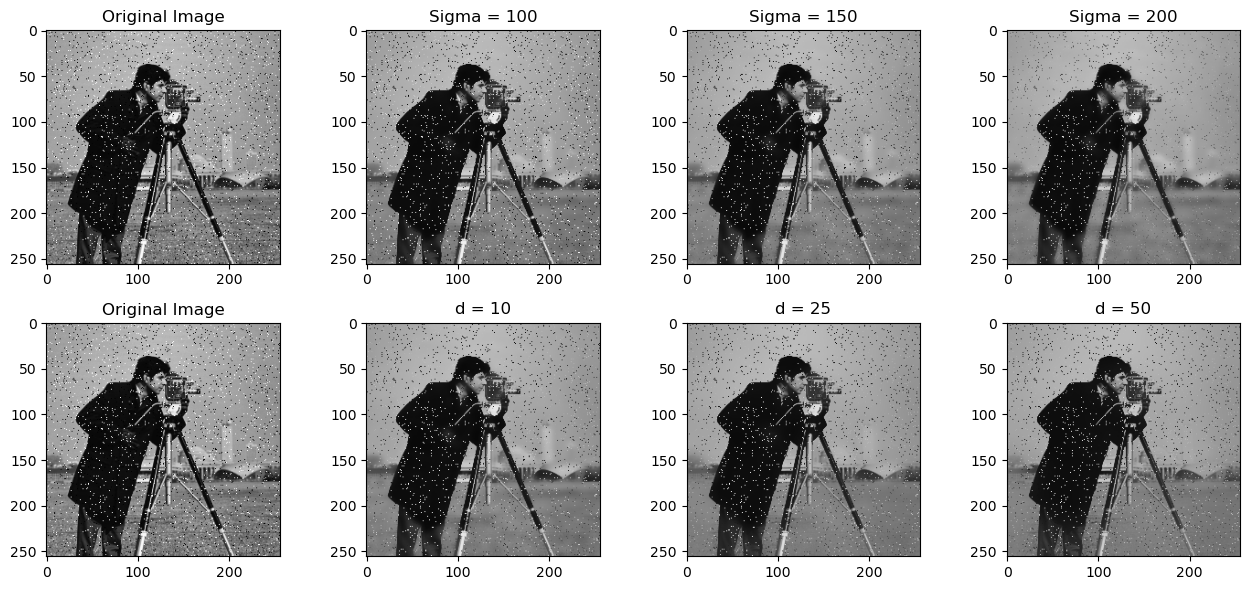

In [7]:
# Changing the sigma values
bilateral100s = cv2.bilateralFilter(img, 10, 100, 100)
bilateral150s = cv2.bilateralFilter(img, 10, 150, 150)
bilateral200s = cv2.bilateralFilter(img, 10, 200, 200)

# Changing the d values
bilateral10d = cv2.bilateralFilter(img, 10, 150, 150)
bilateral25d = cv2.bilateralFilter(img, 25, 150, 150)
bilateral50d = cv2.bilateralFilter(img, 50, 150, 150)

# Display the results
fig, axs = plt.subplots(2, 4, figsize=(13, 6))

axs[0, 0].imshow(img, cmap="gray")
axs[0, 1].imshow(bilateral100s, cmap="gray")
axs[0, 2].imshow(bilateral150s, cmap="gray")
axs[0, 3].imshow(bilateral200s, cmap="gray")
axs[0, 0].set_title('Original Image')
axs[0, 1].set_title('Sigma = 100')
axs[0, 2].set_title('Sigma = 150')
axs[0, 3].set_title('Sigma = 200')

axs[1, 0].imshow(img, cmap="gray")
axs[1, 1].imshow(bilateral10d, cmap="gray")
axs[1, 2].imshow(bilateral25d, cmap="gray")
axs[1, 3].imshow(bilateral50d, cmap="gray")
axs[1, 0].set_title('Original Image')
axs[1, 1].set_title('d = 10')
axs[1, 2].set_title('d = 25')
axs[1, 3].set_title('d = 50')

plt.tight_layout()
plt.show()